# 7:3 Train/Test Ratio

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#read data
df = pd.read_csv('ACB.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 

In [3]:
df

,Date,Price,Open,High,Low,Vol.,Change %
0,23/12/2013,3910.0,3885.1,3910.0,3885.1,434.08K,0.0064
1,24/12/2013,3910.0,3910.0,3910.0,3885.1,211.81K,0.0000
2,25/12/2013,3885.1,3910.0,3910.0,3885.1,163.32K,-0.0064
3,26/12/2013,3885.1,3885.1,3910.0,3885.1,370.75K,0.0000
4,27/12/2013,3910.0,3885.1,3910.0,3885.1,561.24K,0.0064
...,...,...,...,...,...,...,...
2488,18/12/2023,22800.0,22700.0,22800.0,22650.0,6.39M,0.0022
2489,19/12/2023,23050.0,22800.0,23100.0,22800.0,11.47M,0.0110
2490,20/12/2023,23200.0,23050.0,23250.0,23050.0,8.86M,0.0065
2491,21/12/2023,23250.0,23200.0,23250.0,23050.0,7.08M,0.0022


In [4]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.7 * len(df))
test_size = int(0.3 * len(df))

train_data = (df[:train_size])
test_data = df[train_size:]

In [5]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=23081.621, Time=2.29 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=23119.280, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=23110.651, Time=0.13 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=23112.771, Time=0.18 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=23120.435, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=23087.263, Time=0.26 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=23086.818, Time=0.26 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=23074.476, Time=2.58 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=23088.802, Time=0.26 sec
 ARIMA(4,1,2)(0,0,0)[0] intercept   : AIC=23075.910, Time=2.07 sec
 ARIMA(3,1,3)(0,0,0)[0] intercept   : AIC=23075.719, Time=2.26 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=23074.261, Time=1.68 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=23071.583, Time=1.61 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=23087.989, Time=0.25 sec
 ARIMA(1,1,4)(0,0,0

In [6]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [7]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[21951.33496458 21957.3894068  21963.44385013 21969.49829238
 21975.55273568 21981.60717796 21987.66162124 21993.71606353
 21999.7705068  22005.82494911 22011.87939235 22017.93383469
 22023.98827791 22030.04272027 22036.09716346 22042.15160584
 22048.20604902 22054.26049142 22060.31493458 22066.369377
 22072.42382014 22078.47826257 22084.5327057  22090.58714815
 22096.64159126 22102.69603372 22108.75047681 22114.80491929
 22120.85936237 22126.91380487]


In [8]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE trên tập test là: 5241.16681821401
MAPE trên tập test là: 16.97579052648909
MSLE trên tập test là: 0.054938742522329366
RMSE: 5241.16681821401
MAPE: 16.97579052648909
MSLE: 0.054938742522329366


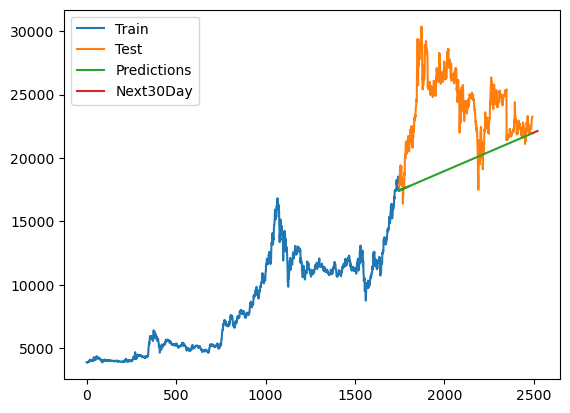

In [9]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

In [11]:
print(model.summary())

                               SARIMAX Results                                
Dep. Variable:                      y   No. Observations:                  748
Model:               SARIMAX(1, 1, 4)   Log Likelihood               -1401.324
Date:                Sat, 30 Dec 2023   AIC                           2816.648
Time:                        09:01:05   BIC                           2848.960
Sample:                             0   HQIC                          2829.101
                                - 748                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.9912      0.181     66.222      0.000      11.636      12.346
ar.L1         -0.9816      0.013    -76.121      0.000      -1.007      -0.956
ma.L1         -2.1601      0.057    -37.836      0.0

In [15]:
model_fit.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               SARIMAX Results                                
==============================================================================
Dep. Variable:                      y   No. Observations:                 1745
Model:               SARIMAX(1, 1, 3)   Log Likelihood              -11529.791
Date:                Tue, 26 Dec 2023   AIC                          23071.583
Time:                        12:36:58   BIC                          23104.367
Sample:                             0   HQIC                         23083.704
                               - 1745                                         
Covariance Type:                  opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
intercept     11.9660      9.387      1.275      0.202      -6.432      30.364
ar.L1         -0.9764      0.009   -108.758      0.000      -0.994      -0.959
ma.L1          0.9227      0.017     53.470      0.000       0.889       0.956
ma.L2          0.0620      0.018      3.376      0.001       0.026       0.098
ma.L3          0.0831      0.015      5.560      0.000       0.054       0.112
sigma2      3.262e+04    499.148     65.352      0.000    3.16e+04    3.36e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.00   Jarque-Bera (JB):              5570.53
Prob(Q):                              0.98   Prob(JB):                         0.00
Heteroskedasticity (H):               8.98   Skew:                            -0.31
Prob(H) (two-sided):                  0.00   Kurtosis:                        11.73
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

# 8:2 Train/Test Ratio

In [10]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [11]:
#read data
df = pd.read_csv('ACB.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,23/12/2013,3910.0,3885.1,3910.0,3885.1,434.08K,0.0064
1,24/12/2013,3910.0,3910.0,3910.0,3885.1,211.81K,0.0000
2,25/12/2013,3885.1,3910.0,3910.0,3885.1,163.32K,-0.0064
3,26/12/2013,3885.1,3885.1,3910.0,3885.1,370.75K,0.0000
4,27/12/2013,3910.0,3885.1,3910.0,3885.1,561.24K,0.0064
...,...,...,...,...,...,...,...
2488,18/12/2023,22800.0,22700.0,22800.0,22650.0,6.39M,0.0022
2489,19/12/2023,23050.0,22800.0,23100.0,22800.0,11.47M,0.0110
2490,20/12/2023,23200.0,23050.0,23250.0,23050.0,8.86M,0.0065
2491,21/12/2023,23250.0,23200.0,23250.0,23050.0,7.08M,0.0022


In [12]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.8 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [13]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=27639.177, Time=0.87 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=27654.356, Time=0.07 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=27652.427, Time=0.14 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=27653.047, Time=0.17 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=27656.298, Time=0.04 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=27637.294, Time=0.55 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=27638.140, Time=0.28 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=27640.908, Time=1.19 sec
 ARIMA(1,1,3)(0,0,0)[0] intercept   : AIC=27639.683, Time=0.37 sec
 ARIMA(0,1,3)(0,0,0)[0] intercept   : AIC=27637.653, Time=0.31 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=27637.126, Time=0.58 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=27637.334, Time=0.25 sec
 ARIMA(3,1,1)(0,0,0)[0] intercept   : AIC=27635.644, Time=1.66 sec
 ARIMA(3,1,0)(0,0,0)[0] intercept   : AIC=27636.516, Time=0.28 sec
 ARIMA(4,1,1)(0,0,0

In [14]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [15]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[31591.89672936 31603.06217442 31614.22761947 31625.39306453
 31636.55850958 31647.72395464 31658.88939969 31670.05484475
 31681.2202898  31692.38573486 31703.55117991 31714.71662497
 31725.88207002 31737.04751508 31748.21296013 31759.37840519
 31770.54385024 31781.7092953  31792.87474035 31804.04018541
 31815.20563046 31826.37107552 31837.53652057 31848.70196563
 31859.86741068 31871.03285573 31882.19830079 31893.36374584
 31904.5291909  31915.69463595]


In [16]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE trên tập test là: 5944.317316650204
MAPE trên tập test là: 22.883175576043943
MSLE trên tập test là: 0.0526090254751156
RMSE: 5944.317316650204
MAPE: 22.883175576043943
MSLE: 0.0526090254751156


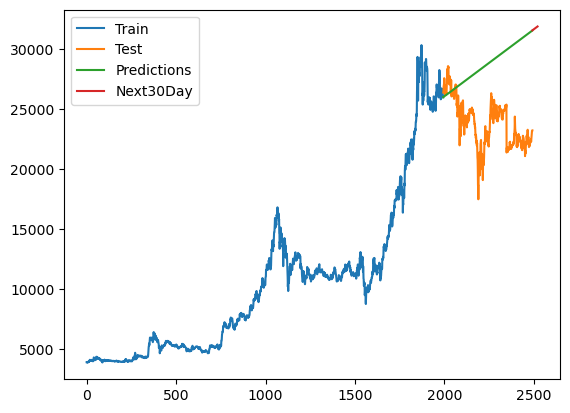

In [17]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()

# 9:1 Train/Test Ratio

In [1]:
#import libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm

In [2]:
#read data
df = pd.read_csv('ACB.csv')
df = df.dropna() 
df = df.reset_index(drop=True) 
df

,Date,Price,Open,High,Low,Vol.,Change %
0,23/12/2013,3910.0,3885.1,3910.0,3885.1,434.08K,0.64%
1,24/12/2013,3910.0,3910.0,3910.0,3885.1,211.81K,0.00%
2,25/12/2013,3885.1,3910.0,3910.0,3885.1,163.32K,-0.64%
3,26/12/2013,3885.1,3885.1,3910.0,3885.1,370.75K,0.00%
4,27/12/2013,3910.0,3885.1,3910.0,3885.1,561.24K,0.64%
...,...,...,...,...,...,...,...
2488,18/12/2023,22800.0,22700.0,22800.0,22650.0,6.39M,0.22%
2489,19/12/2023,23050.0,22800.0,23100.0,22800.0,11.47M,1.10%
2490,20/12/2023,23200.0,23050.0,23250.0,23050.0,8.86M,0.65%
2491,21/12/2023,23250.0,23200.0,23250.0,23050.0,7.08M,0.22%


In [3]:
#1. Split the data into training, testing, and validation sets
train_size = int(0.9 * len(df))
test_size = len(df) - train_size

train_data = (df[:train_size])
test_data = df[train_size:]

In [4]:
# 2. Training data
x_train = np.array(train_data.index).reshape(-1, 1)
y_train = np.array(train_data['Price'])

# Find the best ARIMA model using auto_arima
from pmdarima.arima import auto_arima
from statsmodels.tsa.arima.model import ARIMA

model = auto_arima(y_train, trace=True, error_action='ignore', suppress_warnings=True)

# Fit the model
model_fit = model.fit(y_train)

Performing stepwise search to minimize aic
 ARIMA(2,1,2)(0,0,0)[0] intercept   : AIC=31758.457, Time=3.60 sec
 ARIMA(0,1,0)(0,0,0)[0] intercept   : AIC=31762.503, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0] intercept   : AIC=31764.154, Time=0.09 sec
 ARIMA(0,1,1)(0,0,0)[0] intercept   : AIC=31764.177, Time=0.20 sec
 ARIMA(0,1,0)(0,0,0)[0]             : AIC=31762.438, Time=0.03 sec
 ARIMA(1,1,2)(0,0,0)[0] intercept   : AIC=31760.961, Time=0.63 sec
 ARIMA(2,1,1)(0,0,0)[0] intercept   : AIC=31760.983, Time=0.63 sec
 ARIMA(3,1,2)(0,0,0)[0] intercept   : AIC=inf, Time=2.80 sec
 ARIMA(2,1,3)(0,0,0)[0] intercept   : AIC=31760.160, Time=1.09 sec
 ARIMA(1,1,1)(0,0,0)[0] intercept   : AIC=31757.331, Time=0.70 sec
 ARIMA(0,1,2)(0,0,0)[0] intercept   : AIC=31764.303, Time=0.24 sec
 ARIMA(2,1,0)(0,0,0)[0] intercept   : AIC=31764.110, Time=0.16 sec
 ARIMA(1,1,1)(0,0,0)[0]             : AIC=31757.301, Time=0.30 sec
 ARIMA(0,1,1)(0,0,0)[0]             : AIC=31764.158, Time=0.08 sec
 ARIMA(1,1,0)(0,0,0)[0]  

In [5]:
# 3. Testing process
x_test = np.array(test_data.index).reshape(-1, 1)
y_test = np.array(test_data['Price'])
y_pred = model.predict(n_periods=len(y_test)+30)

In [6]:
# 4. Predict the next 30 days
last_index =  df.index[-1]
last_data = pd.RangeIndex(start=last_index, stop=last_index+30, step=1)

# # Predict the closing prices for the next 30 days
y_next_30_days = y_pred[-30:]
y_pred = y_pred[:-30]

# Print the predicted closing prices for the next 30 days
print('Predicted closing prices for the next 30 days:')
print(y_next_30_days)

Predicted closing prices for the next 30 days:
[22911.46316846 22911.41982636 22911.46210144 22911.42086712
 22911.4610863  22911.42185726 22911.46012054 22911.42279925
 22911.45920174 22911.42369543 22911.45832762 22911.42454803
 22911.45749601 22911.42535916 22911.45670485 22911.42613085
 22911.45595216 22911.42686501 22911.45523607 22911.42756347
 22911.45455481 22911.42822796 22911.45390668 22911.42886013
 22911.45329006 22911.42946156 22911.45270344 22911.43003375
 22911.45214534 22911.4305781 ]


In [7]:
# 5. Evaluate accuracy
#RMSE
test_rmse = np.sqrt(np.mean((y_pred - y_test)**2))
print('RMSE:', test_rmse)

#MAPE
test_mape = np.mean(np.abs((y_test - y_pred) / y_test)) * 100
print('MAPE:', test_mape)

#MSLE
from sklearn.metrics import mean_squared_log_error
msle = mean_squared_log_error(y_test, y_pred)
print(f"MSLE: {msle}")

RMSE: 1354.8231109748747
MAPE: 4.851932602603322
MSLE: 0.003305656355044336


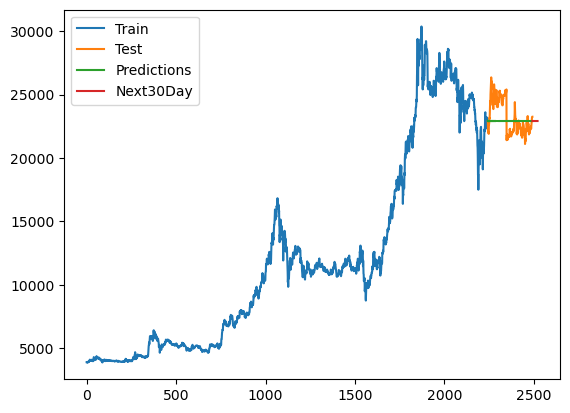

In [8]:
# 6.Show plot
plt.plot(train_data.index, train_data['Price'])
plt.plot(test_data.index, test_data['Price'])
plt.plot(test_data.index, y_pred)
plt.plot(last_data,y_next_30_days)
plt.legend(['Train', 'Test', 'Predictions','Next30Day'])
plt.show()